# Batch Gradient Descent vs Stochastic Gradient Descent vs Mini Batch Gradient Descent

**Batch Gradient Descent**      

In Batch Gradient Descent , we go through all training samples and calculate cummulative error    
Now be back propogate and adjust weights

**Stochastic Gradient Descent**   

In stochastic Gradient Descent , we take one random sample and calculate error for it  
Now we adjust the weights and again random sample is selected and the process is repeated

**Mini Batch Gradient Descent**   

It is similar to SGD but instead of using one randomly picked training sample, we use a batch of randomly picked training samples

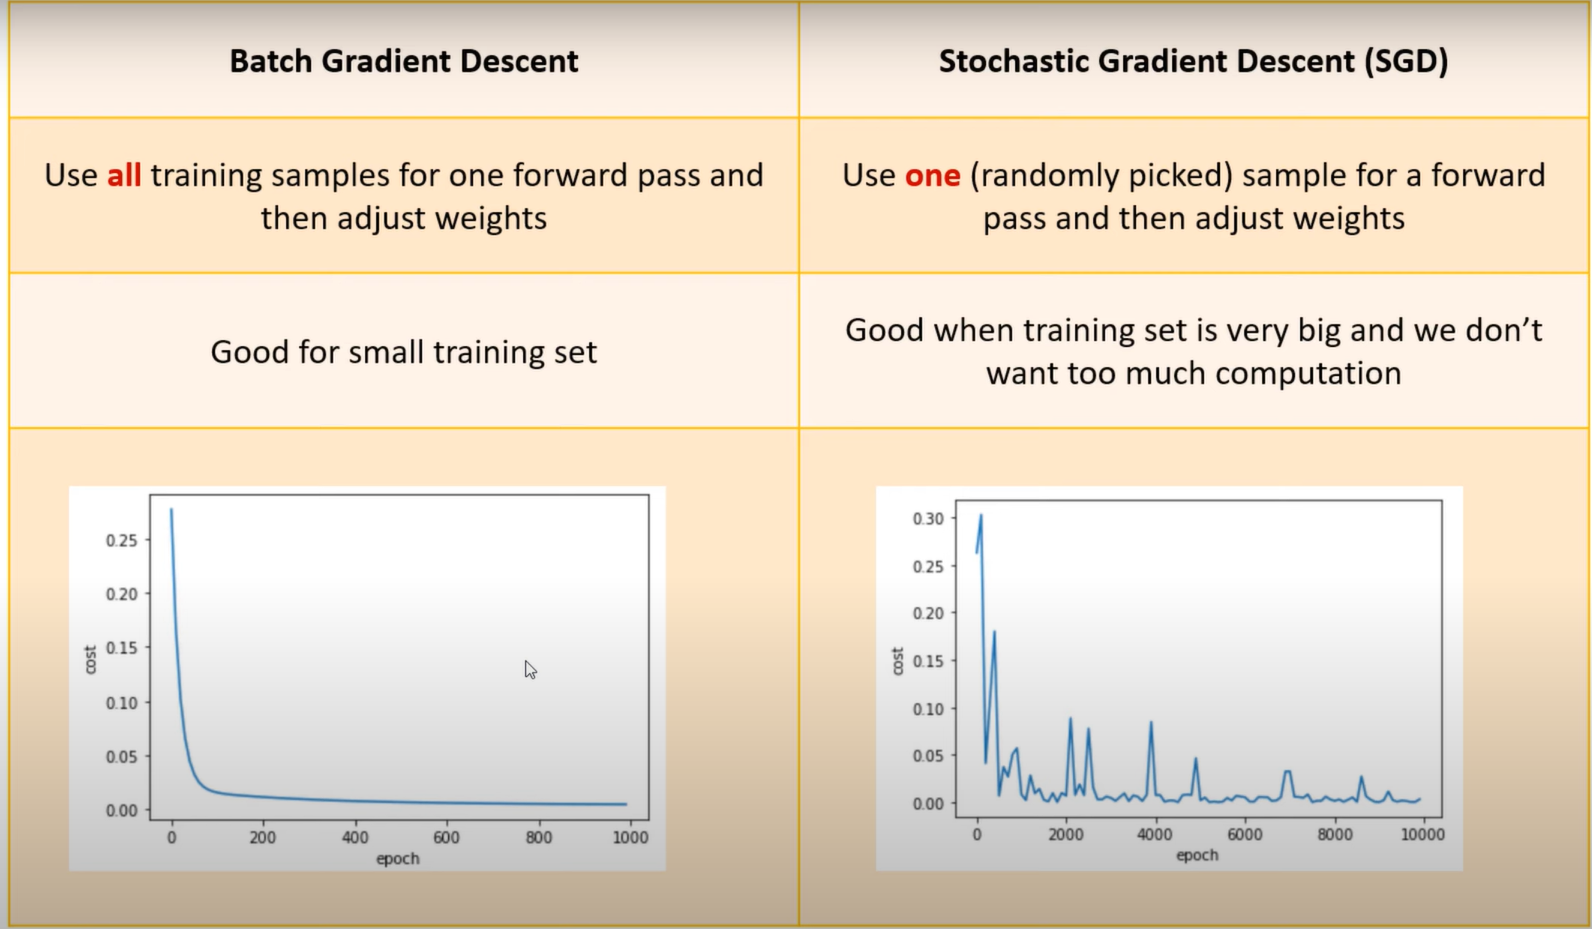

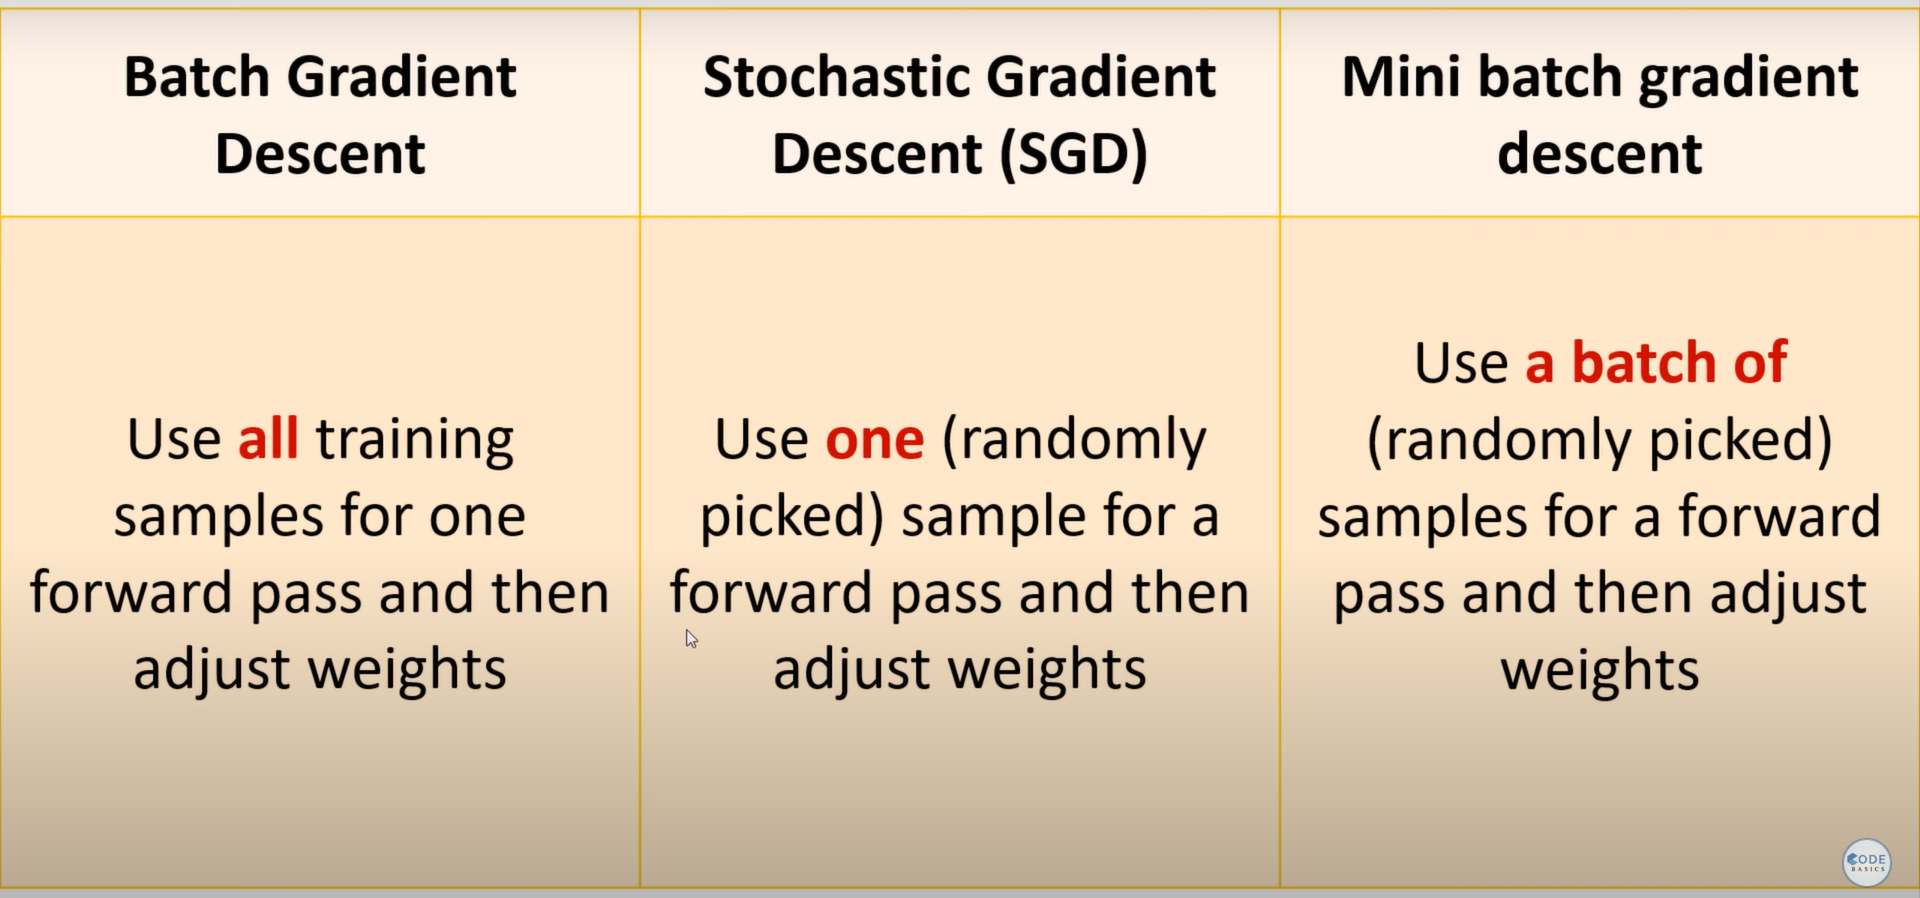

In [1]:
import numpy as np
import pandas as pd
import math

# Batch Gradient Descent

In [2]:
lst=[
(1056,2,39.07),
(2600,4,120),
(1440,3,62),
(1521,3,75),
(1200,2,51),
(1170,2,38),
(2732,4,135),
(3300,4,155),
(1310,3,50),
(3700,5,167),
(1800,3,82),
(2785,4,140),
(1000,2,38),
(1100,2,40),
(2250,3,101),
(1175,2,42),
(1180,3,48),
(1540,3,60),
(2770,3,102),
(800,1,32)
]

In [3]:
data=pd.DataFrame(lst,columns=["area","bedrooms","price"])
data

area  bedrooms   price
0   1056         2   39.07
1   2600         4  120.00
2   1440         3   62.00
3   1521         3   75.00
4   1200         2   51.00
5   1170         2   38.00
6   2732         4  135.00
7   3300         4  155.00
8   1310         3   50.00
9   3700         5  167.00
10  1800         3   82.00
11  2785         4  140.00
12  1000         2   38.00
13  1100         2   40.00
14  2250         3  101.00
15  1175         2   42.00
16  1180         3   48.00
17  1540         3   60.00
18  2770         3  102.00
19   800         1   32.00

In [4]:
x=data[['area','bedrooms']]
x

area  bedrooms
0   1056         2
1   2600         4
2   1440         3
3   1521         3
4   1200         2
5   1170         2
6   2732         4
7   3300         4
8   1310         3
9   3700         5
10  1800         3
11  2785         4
12  1000         2
13  1100         2
14  2250         3
15  1175         2
16  1180         3
17  1540         3
18  2770         3
19   800         1

In [5]:
y=data['price']
y

0      39.07
1     120.00
2      62.00
3      75.00
4      51.00
5      38.00
6     135.00
7     155.00
8      50.00
9     167.00
10     82.00
11    140.00
12     38.00
13     40.00
14    101.00
15     42.00
16     48.00
17     60.00
18    102.00
19     32.00
Name: price, dtype: float64

In [6]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
x_scaler=MinMaxScaler()
y_scaler=MinMaxScaler()

In [7]:
x_scaled=x_scaler.fit_transform(x)
x_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [8]:
#scaling y values
y_scaled=y_scaler.fit_transform(y.values.reshape(data.shape[0],1))
y_scaled

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

**We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D**

In [9]:
y_scaled=y_scaled.reshape(20,)
y_scaled

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [31]:
def batch_gradient_descent(x,y_true,epochs):
    no_of_cols=x.shape[1]
    w=np.ones(no_of_cols)
    b=0
    rate=0.01
    cost_list = []
    epoch_list = []
    n=x.shape[0]
    for i in range(epochs):
        y_predicted=np.dot(w,x.T)+b# w shape = (2,) , x shape = (20, 2) and x.T shape = (2,20)
        # dot product of shapes ((2,) , (2,20)) = (20,) 
        # here (2,) is treated as (1,2) in dot product => (1,2)*(2,20) = (1,20). but since (2,) is taken output is (20,)
        wd=-(2/n)*np.dot(x.T,(y_true-y_predicted)) #shapes of y_true and y_predicted = (20,)
        #(2,20)*(20,) = wd shape (2,)
        bd=-(2/n)*np.sum(y_true-y_predicted)
        w=w-rate*wd
        b=b-rate*bd
        cost=np.mean(np.square(y_true-y_predicted))
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list
w,b,cost,cost_list,epoch_list=batch_gradient_descent(x_scaled,y_scaled,500)
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

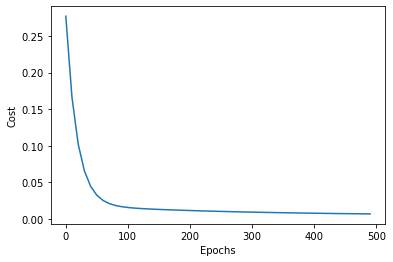

In [109]:
#plotting a graph
import matplotlib.pyplot as plt
plt.plot(epoch_list,cost_list)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

In [112]:
def predict(area,bedrooms,w,b):
    scaled_X = x_scaler.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return y_scaler.inverse_transform([[scaled_price]])[0][0]

predict(1500,3,w,b)

69.47860785714694

# Stochastic Gradient Descent

In [34]:
def stochastic_gradient_descent(x,y_true,epochs):
    no_of_cols=x.shape[1]
    w=np.ones(no_of_cols)
    b=0
    n=x.shape[0]
    rate=0.01
    epoch_list=[]
    cost_list=[]
    for i in range(epochs):
        random_index=np.random.randint(0,x.shape[0]-1)
        sample_x=x[random_index]
        sample_y=y_true[random_index]
        y_predicted=np.dot(w,sample_x.T)+b #w shape (2,) , sample_x shape (2,) 
        wd=-(2/n)*(np.dot(sample_x.T,(sample_y-y_predicted)))
        bd=-(2/n)*np.sum(sample_y-y_predicted)
        w=w-rate*wd
        b=b-rate*bd
        cost=np.mean(np.square(sample_y-y_predicted))
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,epoch_list,cost_list
w,b,cost,epoch_list,cost_list=stochastic_gradient_descent(x_scaled,y_scaled,10000)
w,b,cost

(array([0.72325145, 0.70784369]), -0.2624814470672892, 0.004302300002808238)

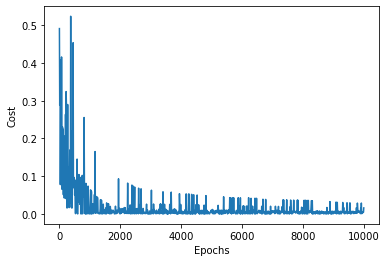

In [144]:
plt.plot(epoch_list,cost_list)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

In [121]:
predict(1500,3,w,b)

67.1843021646027

# Mini Batch Gradient Descent

In [141]:
def mini_batch_gradient_descent(x,y_true,epochs):
    no_of_cols=x.shape[1]
    w=np.ones(no_of_cols)
    b=0
    n=x.shape[0]
    rate=0.01
    epoch_list=[]
    cost_list=[]
    for i in range(epochs):
        sample_indexes=np.random.randint(1,x.shape[0]-1,4)
        sample_x=x[sample_indexes]
        sample_y=y_true[sample_indexes]
        y_predicted=np.dot(w,sample_x.T)+b
        wd=-(2/n)*np.dot(sample_x.T,(sample_y-y_predicted))
        bd=-(2/n)*np.sum(sample_y-y_predicted)
        w=w-rate*wd
        b=b-rate*bd
        cost=np.mean(np.square(sample_y-y_predicted))
        if i%10==0:
            epoch_list.append(i)
            cost_list.append(cost)
    return w,b,cost,epoch_list,cost_list
w,b,cost,epoch_list,cost_list=mini_batch_gradient_descent(x_scaled,y_scaled,4000)
w,b,cost

(array([0.69331577, 0.67276737]), -0.23601519480659275, 0.001974624453245284)

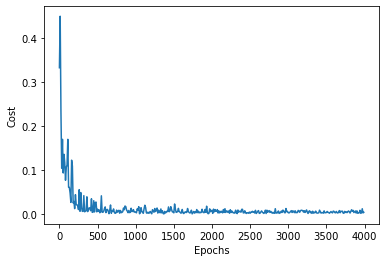

In [142]:
plt.plot(epoch_list,cost_list)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

In [140]:
predict(1500,3,w,b)

68.1194220834782

# Chain Rule

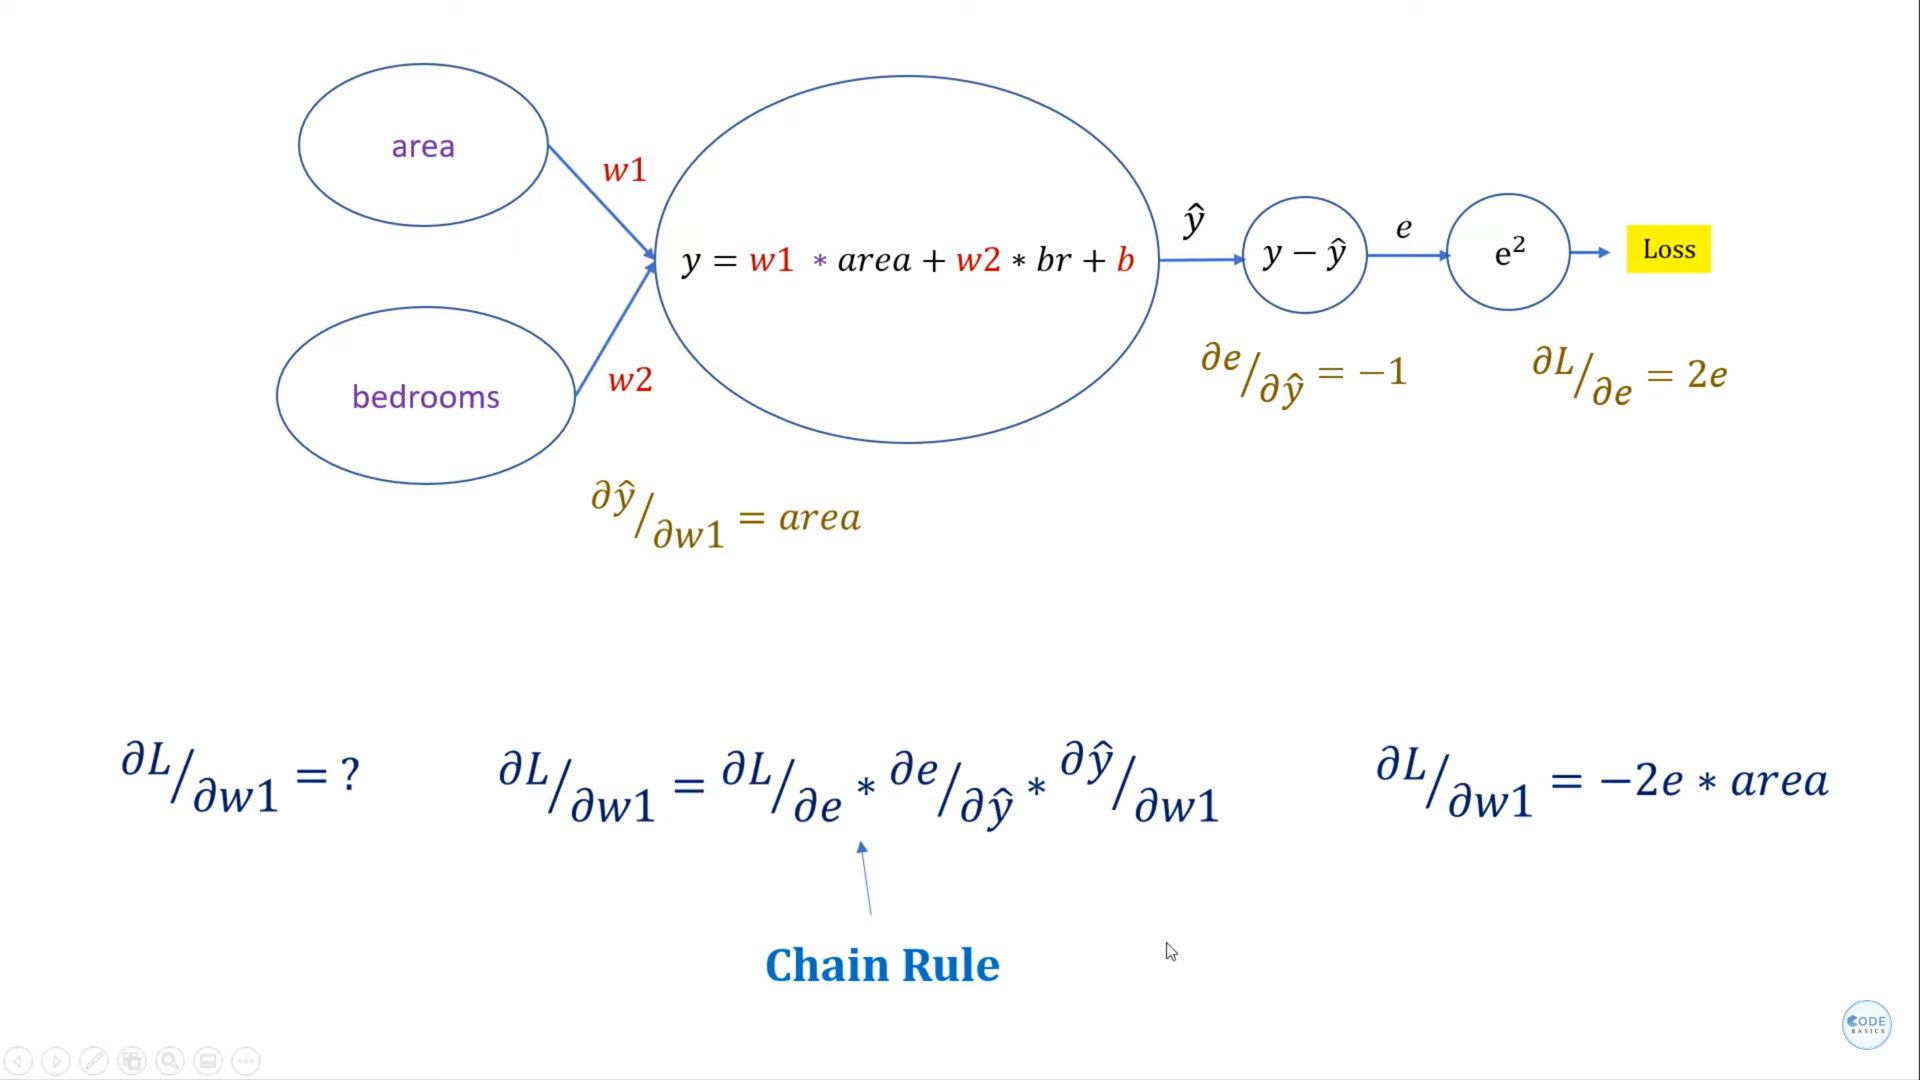

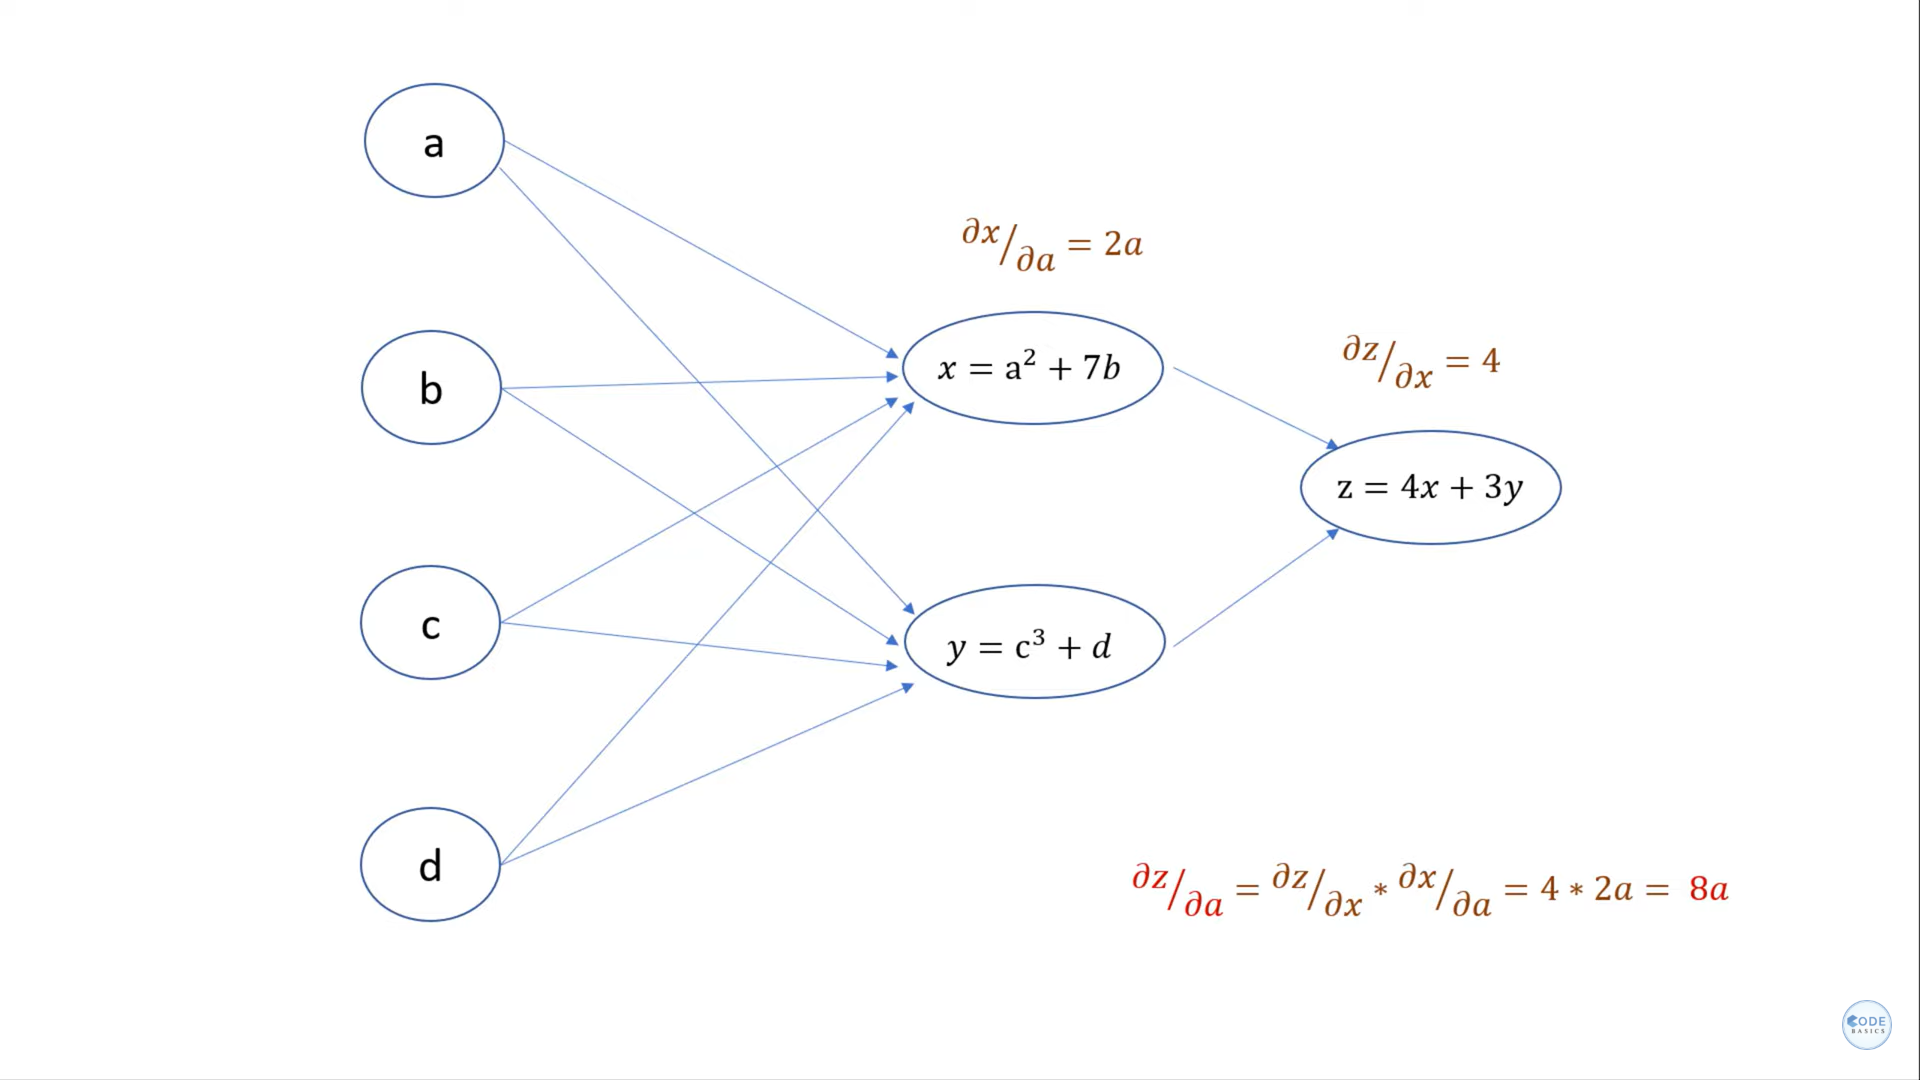

# Tensorboard

It is Tensorflow's visualization Toolkit    
It will be useful for debugging the issues with Deep learning

In [1]:
from tensorflow import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [8]:
len(x_test)

10000

In [14]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
tb_callback=tf.keras.callbacks.TensorBoard(log_dir='logs/',histogram_freq=1)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=5,callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3684 - accuracy: 0.8397
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3808 - accuracy: 0.9029
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2984 - accuracy: 0.9224
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2607 - accuracy: 0.9335
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2348 - accuracy: 0.9393


**Command in command prompt : tensorboard --logdir logs/**
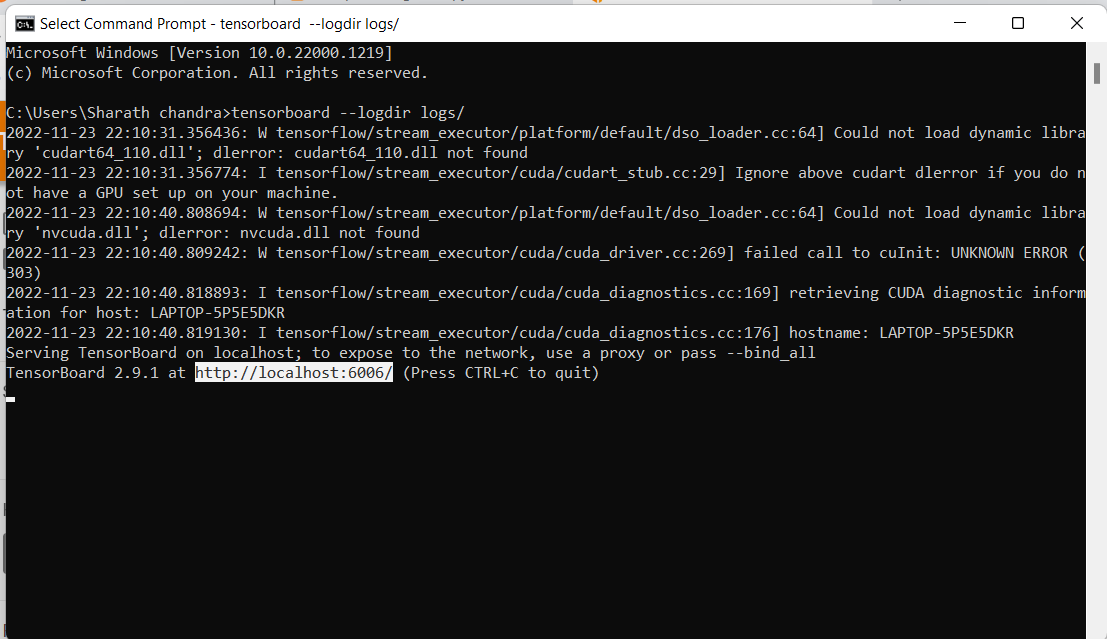
**Highlighted part is to be copied and pasted in browser**

# Small Image Classification Using Simple Aritifical Neural Network

In [15]:
#checking the list of physical devices available 
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

**Loading this dataset**
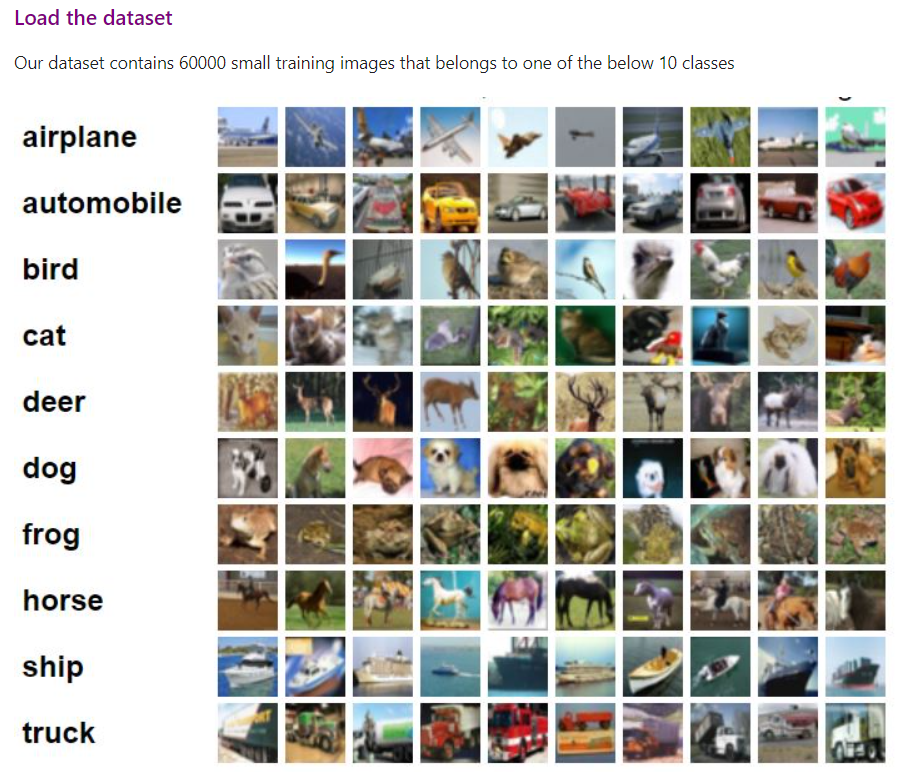

In [52]:
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()

In [53]:
x_train.shape

(50000, 32, 32, 3)

In [54]:
y_train.shape

(50000, 1)

In [55]:
y_train.dtype

dtype('uint8')

In [56]:
x_train.dtype

dtype('uint8')

**Data Visualization**

In [57]:
def plot(index):
    plt.imshow(x_train[index])
    plt.show()

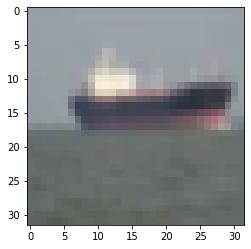

In [58]:
plot(69)

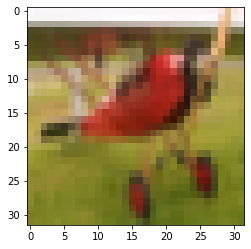

In [59]:
plot(35)

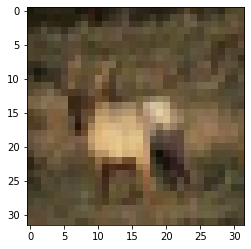

In [60]:
plot(3)

**Difference between matshow and imshow in matplotlib**        

Matplotlib matshow is a wrapper for imshow , in that it "sets origin to 'upper', 'interpolation' to 'nearest' and 'aspect' to equal." So while **matshow always uses interpolation="nearest" , imshow by default has interpolation=None** . Note that this is different from interpolation="none" .

In [61]:
#these are the corresponding names for the output indexes
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

**Scaling the values**

In [62]:
#scaling x_train and y_train
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [63]:
#scaling y_train and y_test
#one hot encoding
y_train_categorical=keras.utils.to_categorical(
    y_train,num_classes=10,dtype='float32'
)
y_test_categorical=keras.utils.to_categorical(
    y_test,num_classes=10,dtype='float32'
)

In [64]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [65]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

**Model building and training**

In [66]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_scaled,y_train_categorical,epochs=1)

1563/1563 [==============================] - 195s 124ms/step - loss: 1.8169 - accuracy: 0.3510


The model with should be runned with 50 epochs to get good accuracy but since it takes so much time we have taken only one time

In [77]:
#we cannot predict single value instead need to predict for all values at a time and should be stored in new variable
predicted_values=model.predict(x_test_scaled)

313/313 [==============================] - 9s 30ms/step


In [101]:
#checking the value at index 22 of x_test
classes[np.argmax(predicted_values[22])]

'airplane'

In [102]:
classes[y_test[22][0]]

'deer'

# Precision, Recall and f1-score

For TP, FP, TN, FN consider only predictions
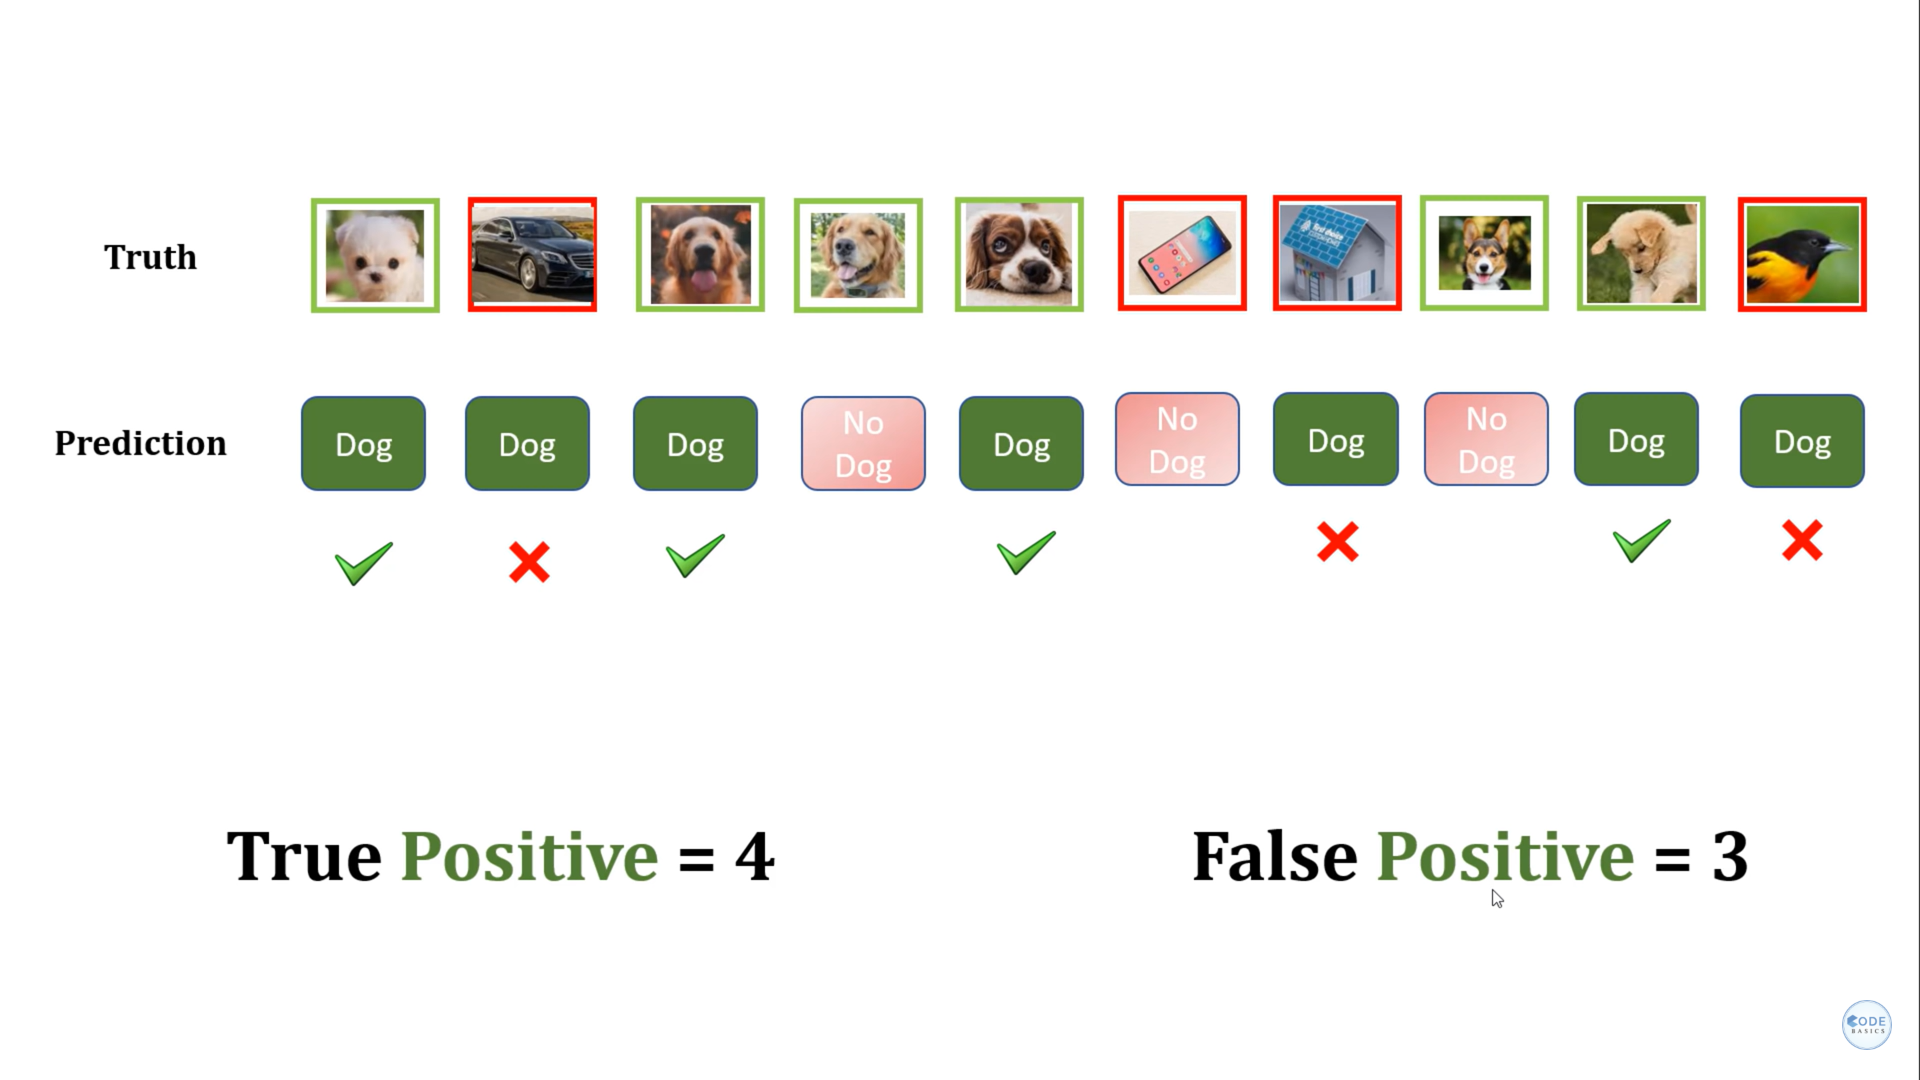
Consider only positive predictions (i.e dog)   
True positive - correct prediction of dog    
False positive - wrong prediction of dog 

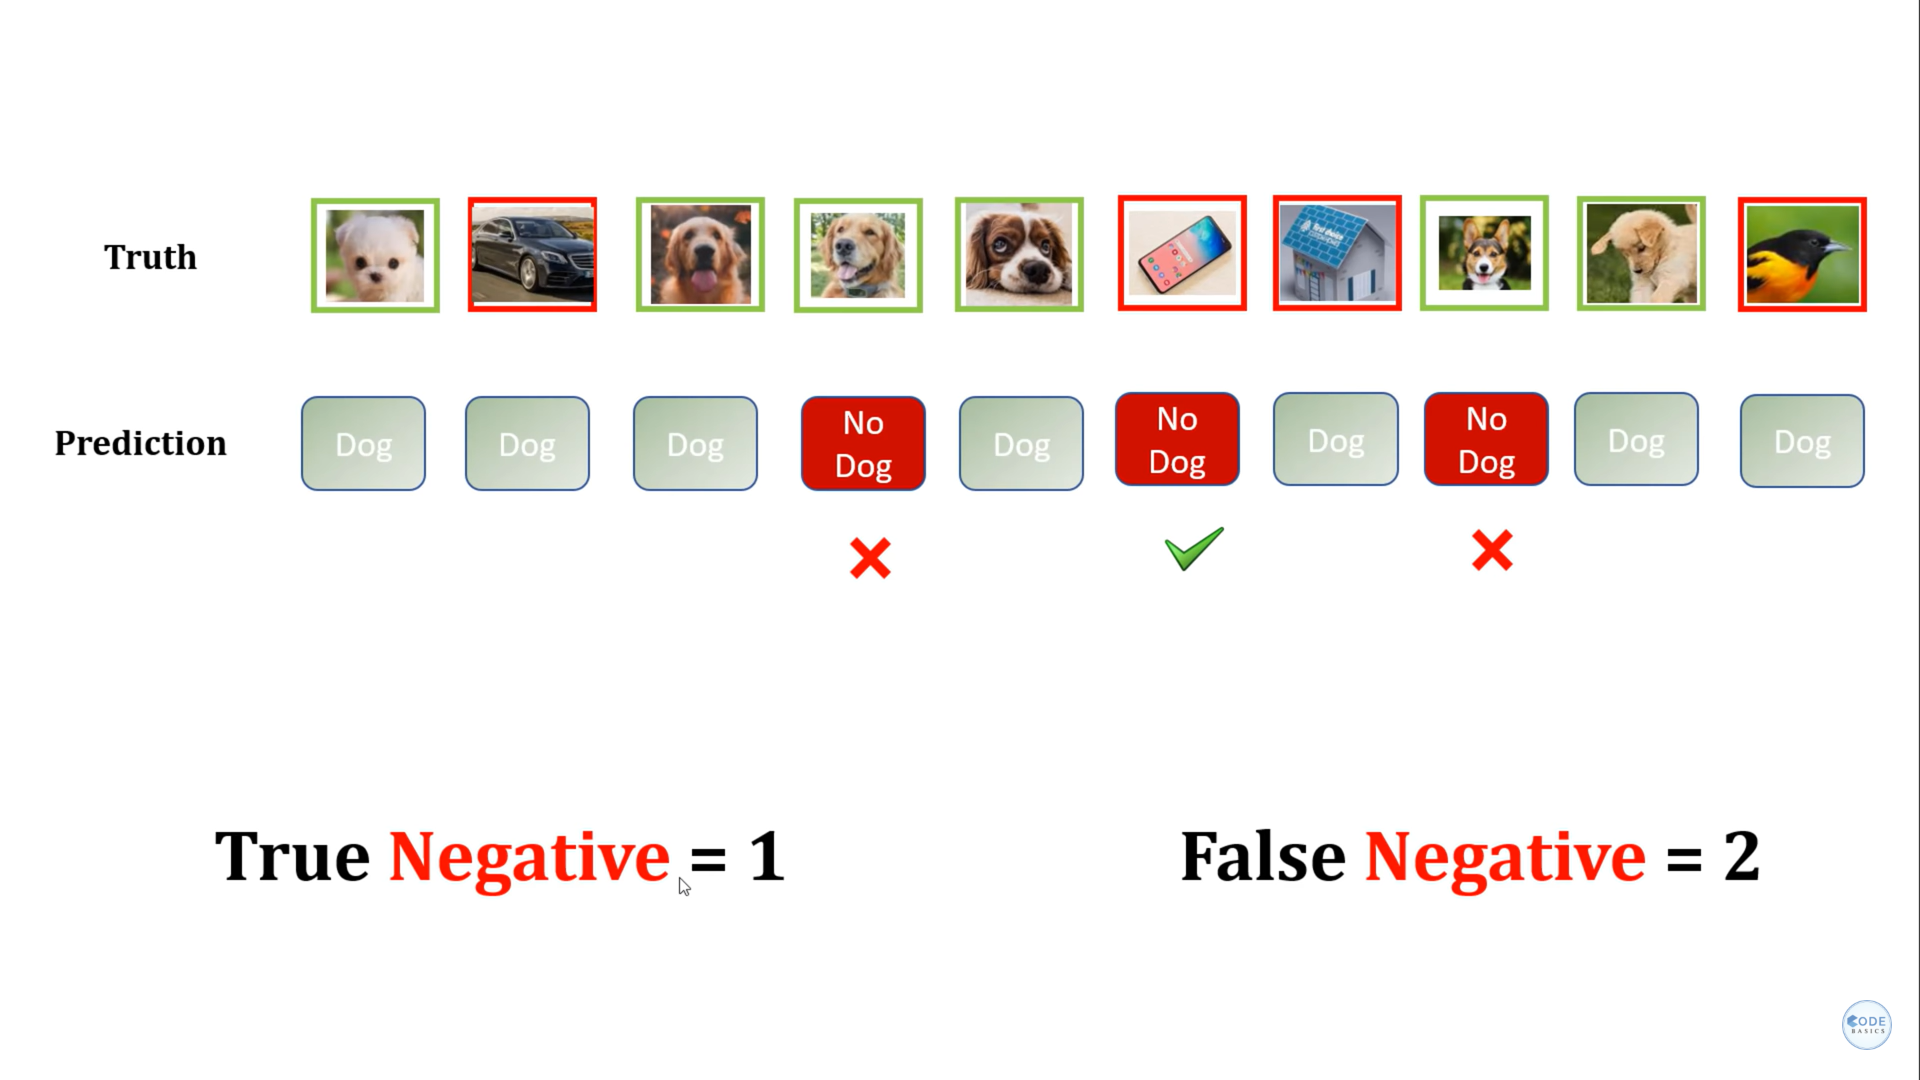
Consider only negative predictions (i.e dog)   
True positive - correct prediction of dog    
False positive - wrong prediction of dog 

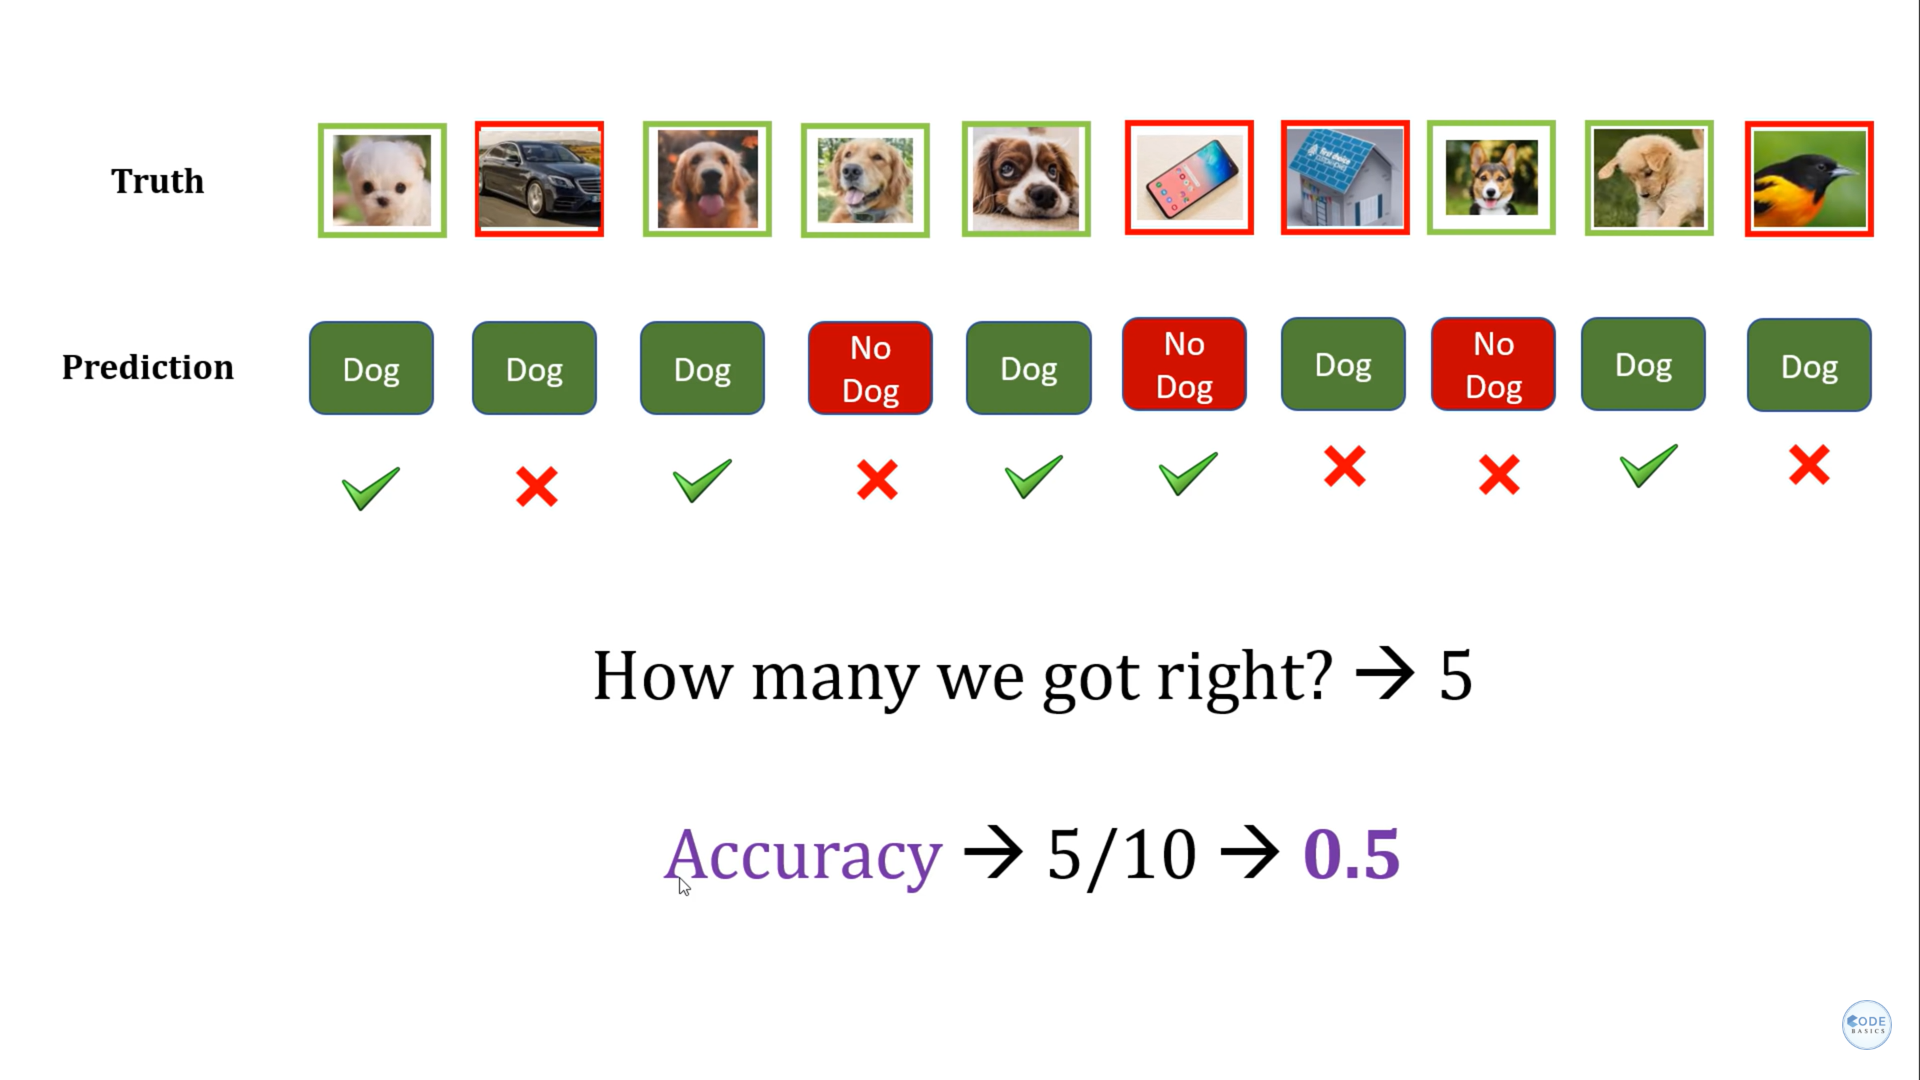

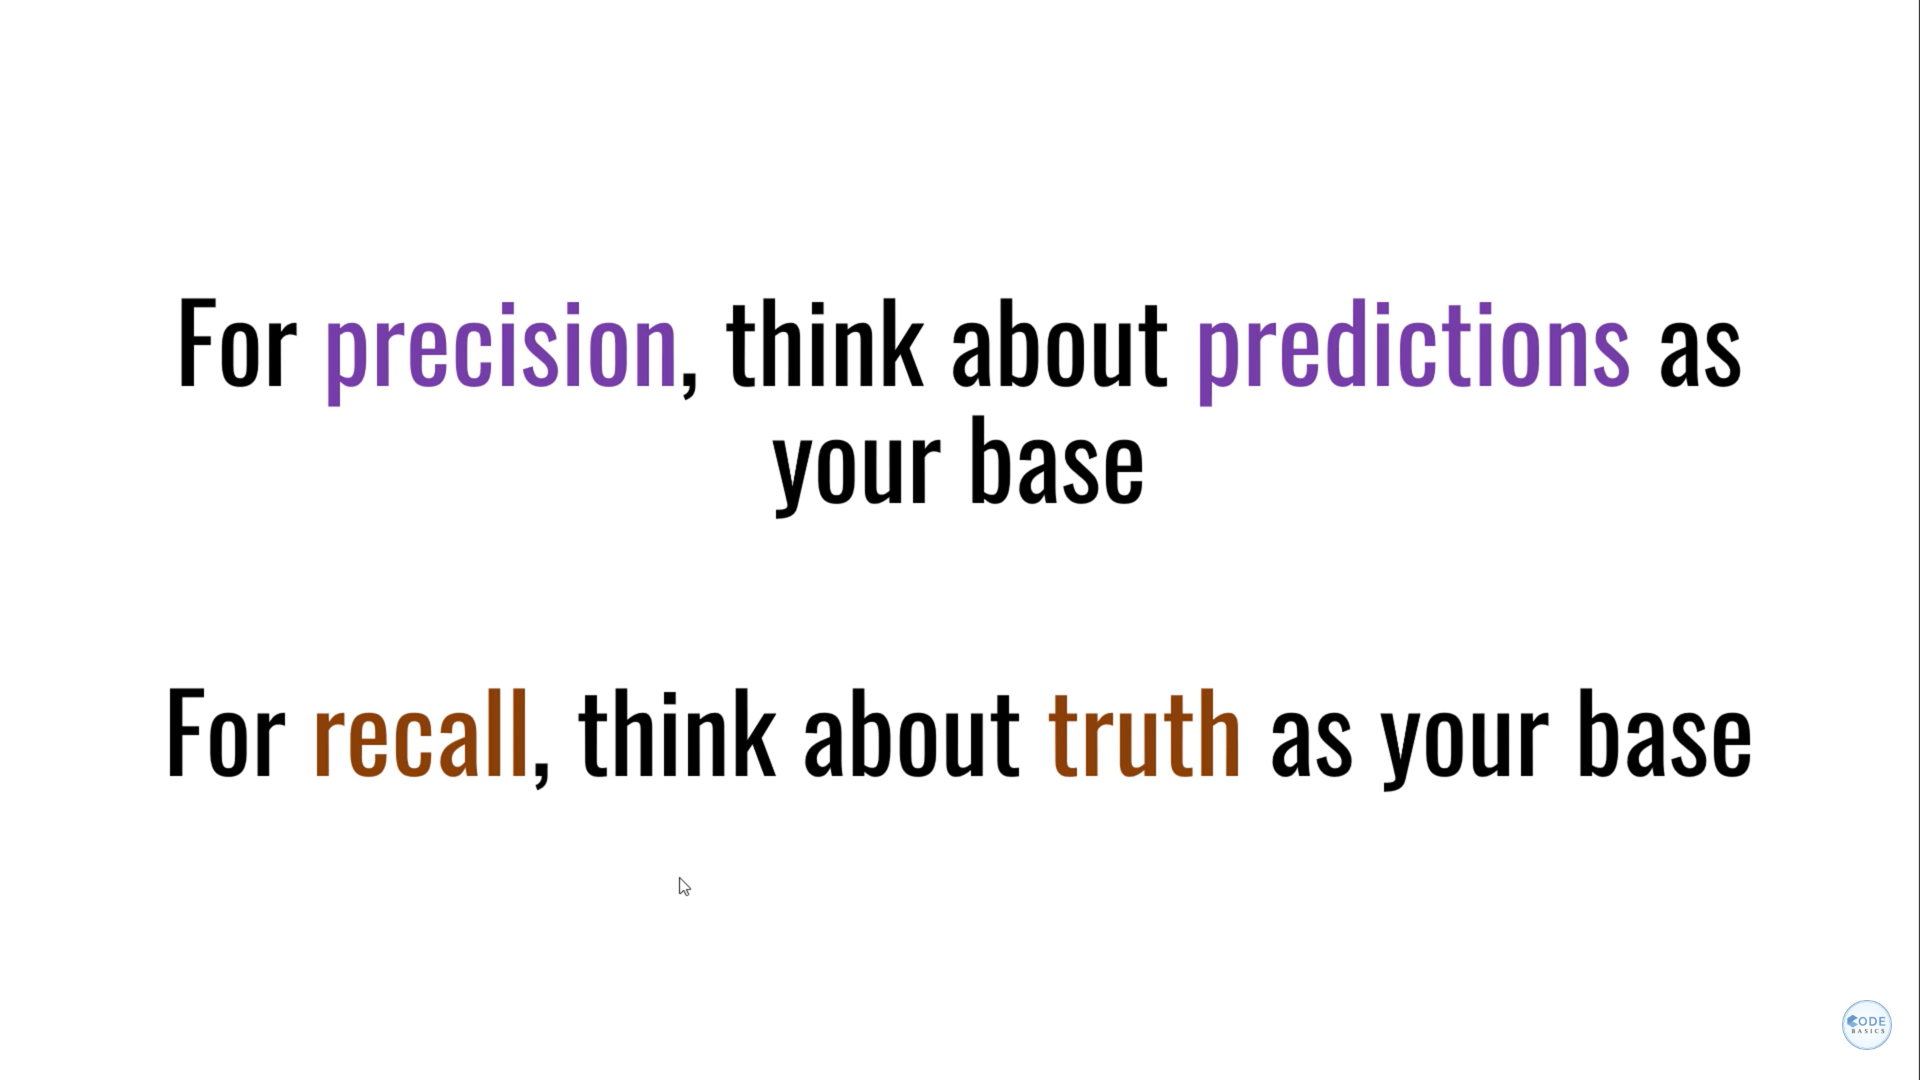

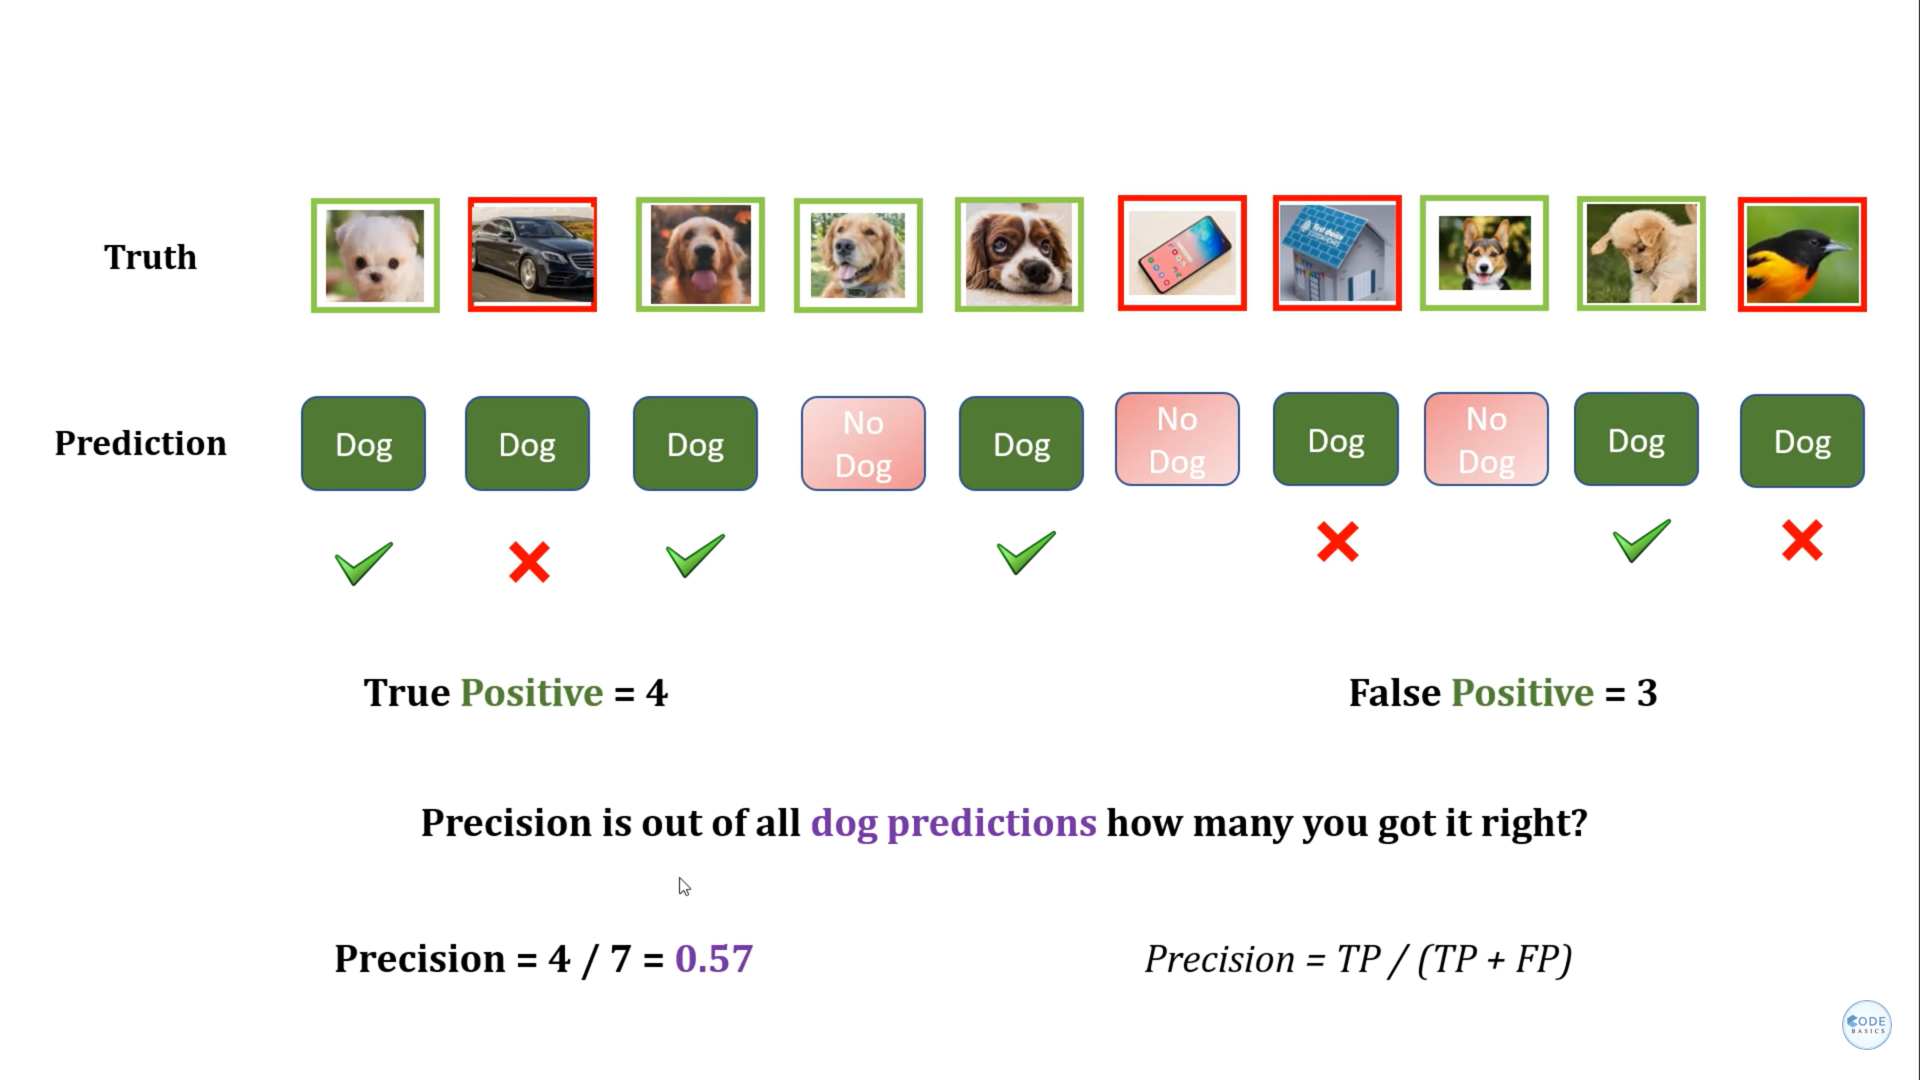 

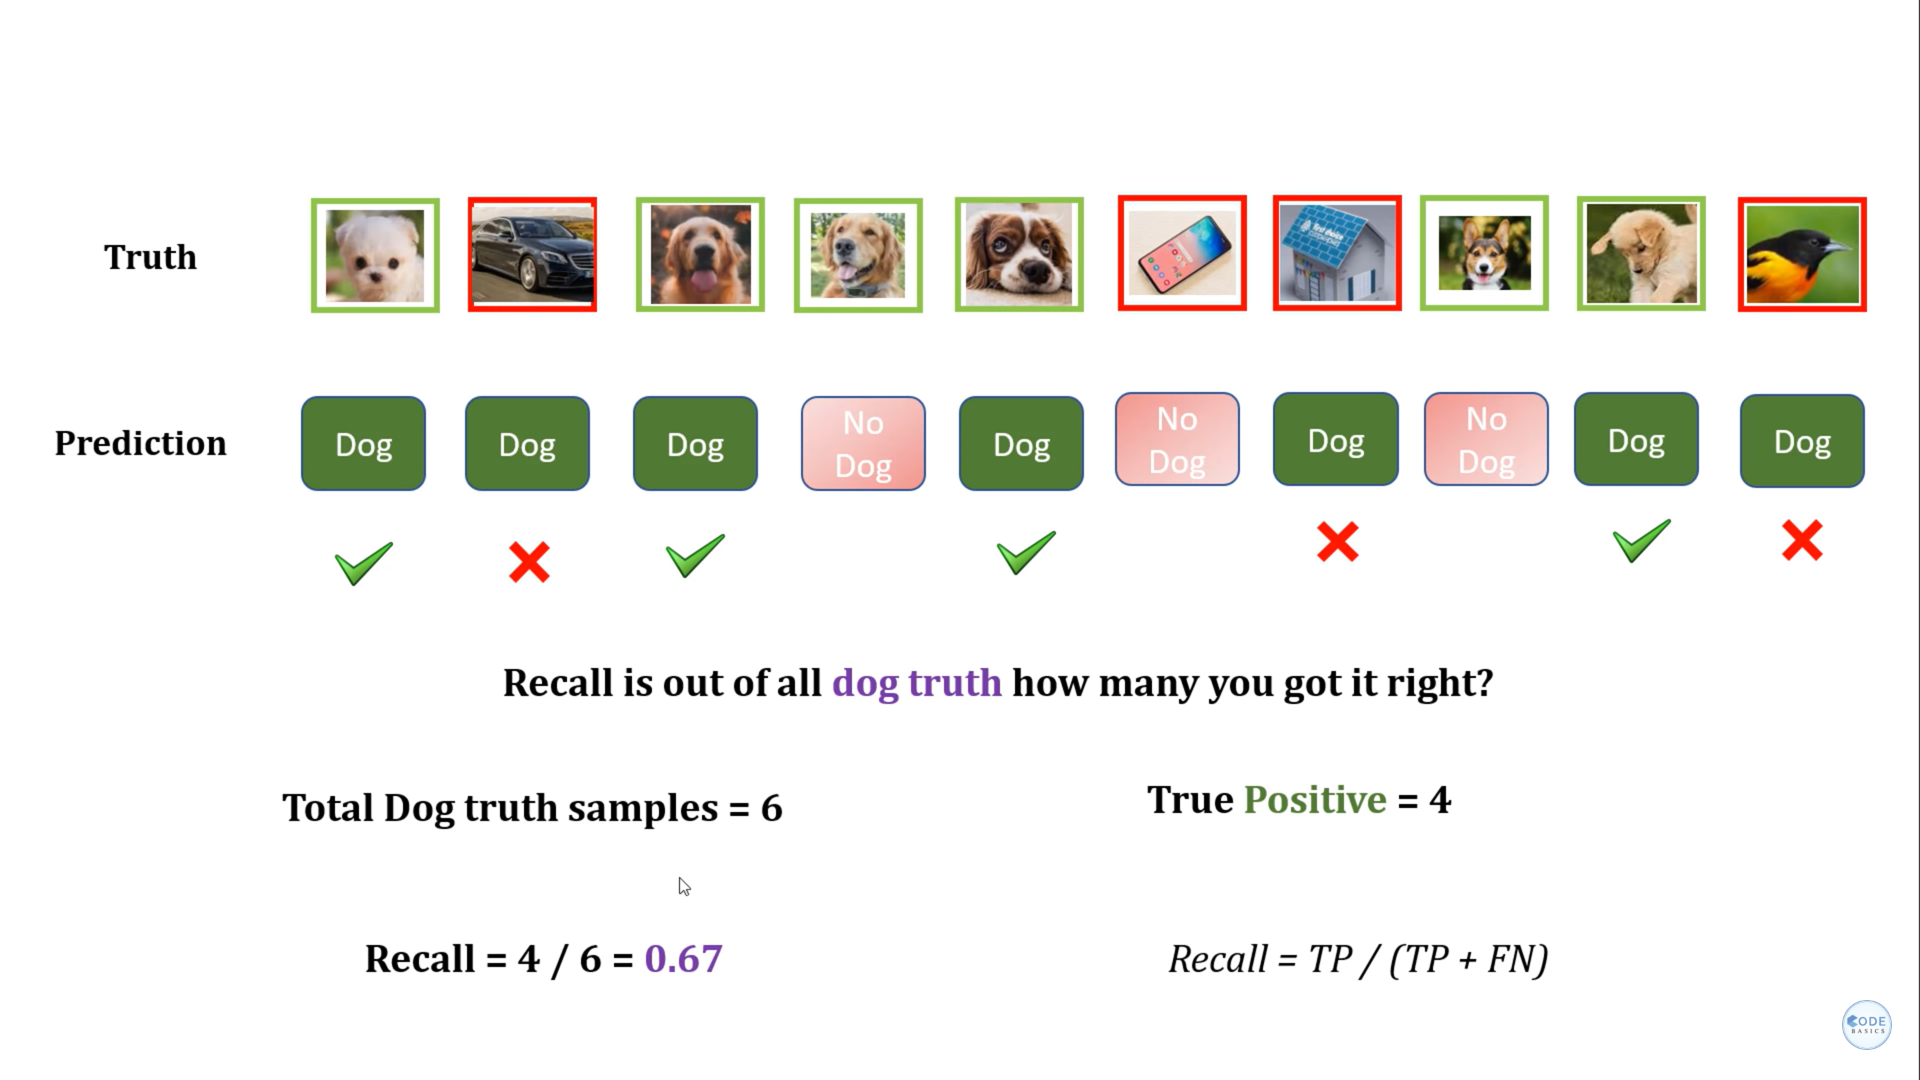

**F1 score**
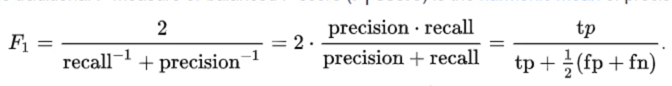

In [1]:
truth =      ["Dog","Not a dog","Dog","Dog",      "Dog", "Not a dog", "Not a dog", "Dog",       "Dog", "Not a dog"]
prediction = ["Dog","Dog",      "Dog","Not a dog","Dog", "Not a dog", "Dog",       "Not a dog", "Dog", "Dog"]

In [11]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
cm=confusion_matrix(truth,prediction)
cm_df=pd.DataFrame(cm,index=['Dog','Not a Dog'],columns=['Dog','Not a Dog'])
cm_df

Dog  Not a Dog
Dog          4          2
Not a Dog    3          1

Text(33.0, 0.5, 'Truth')

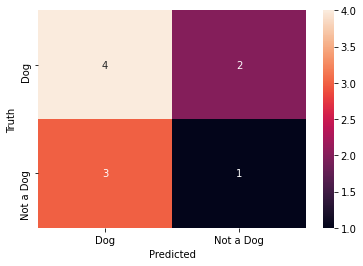

In [16]:
sns.heatmap(cm_df,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [17]:
print(classification_report(truth,prediction))

              precision    recall  f1-score   support

         Dog       0.57      0.67      0.62         6
   Not a dog       0.33      0.25      0.29         4

    accuracy                           0.50        10
   macro avg       0.45      0.46      0.45        10
weighted avg       0.48      0.50      0.48        10



# Dropout Regularization

It is a Regularization technique in Deep learning for handling overfitting


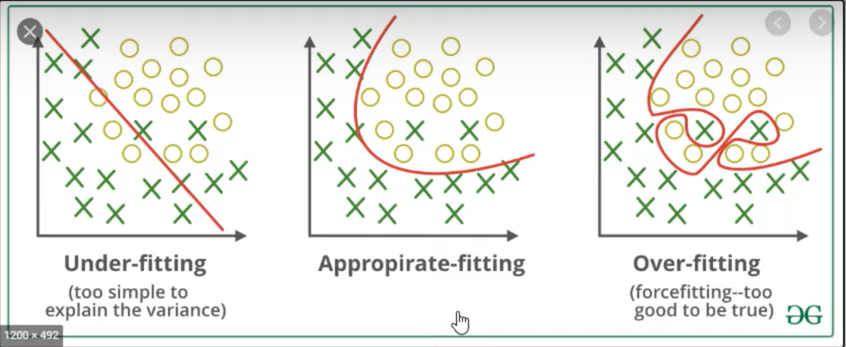

It may lead to overfitting 
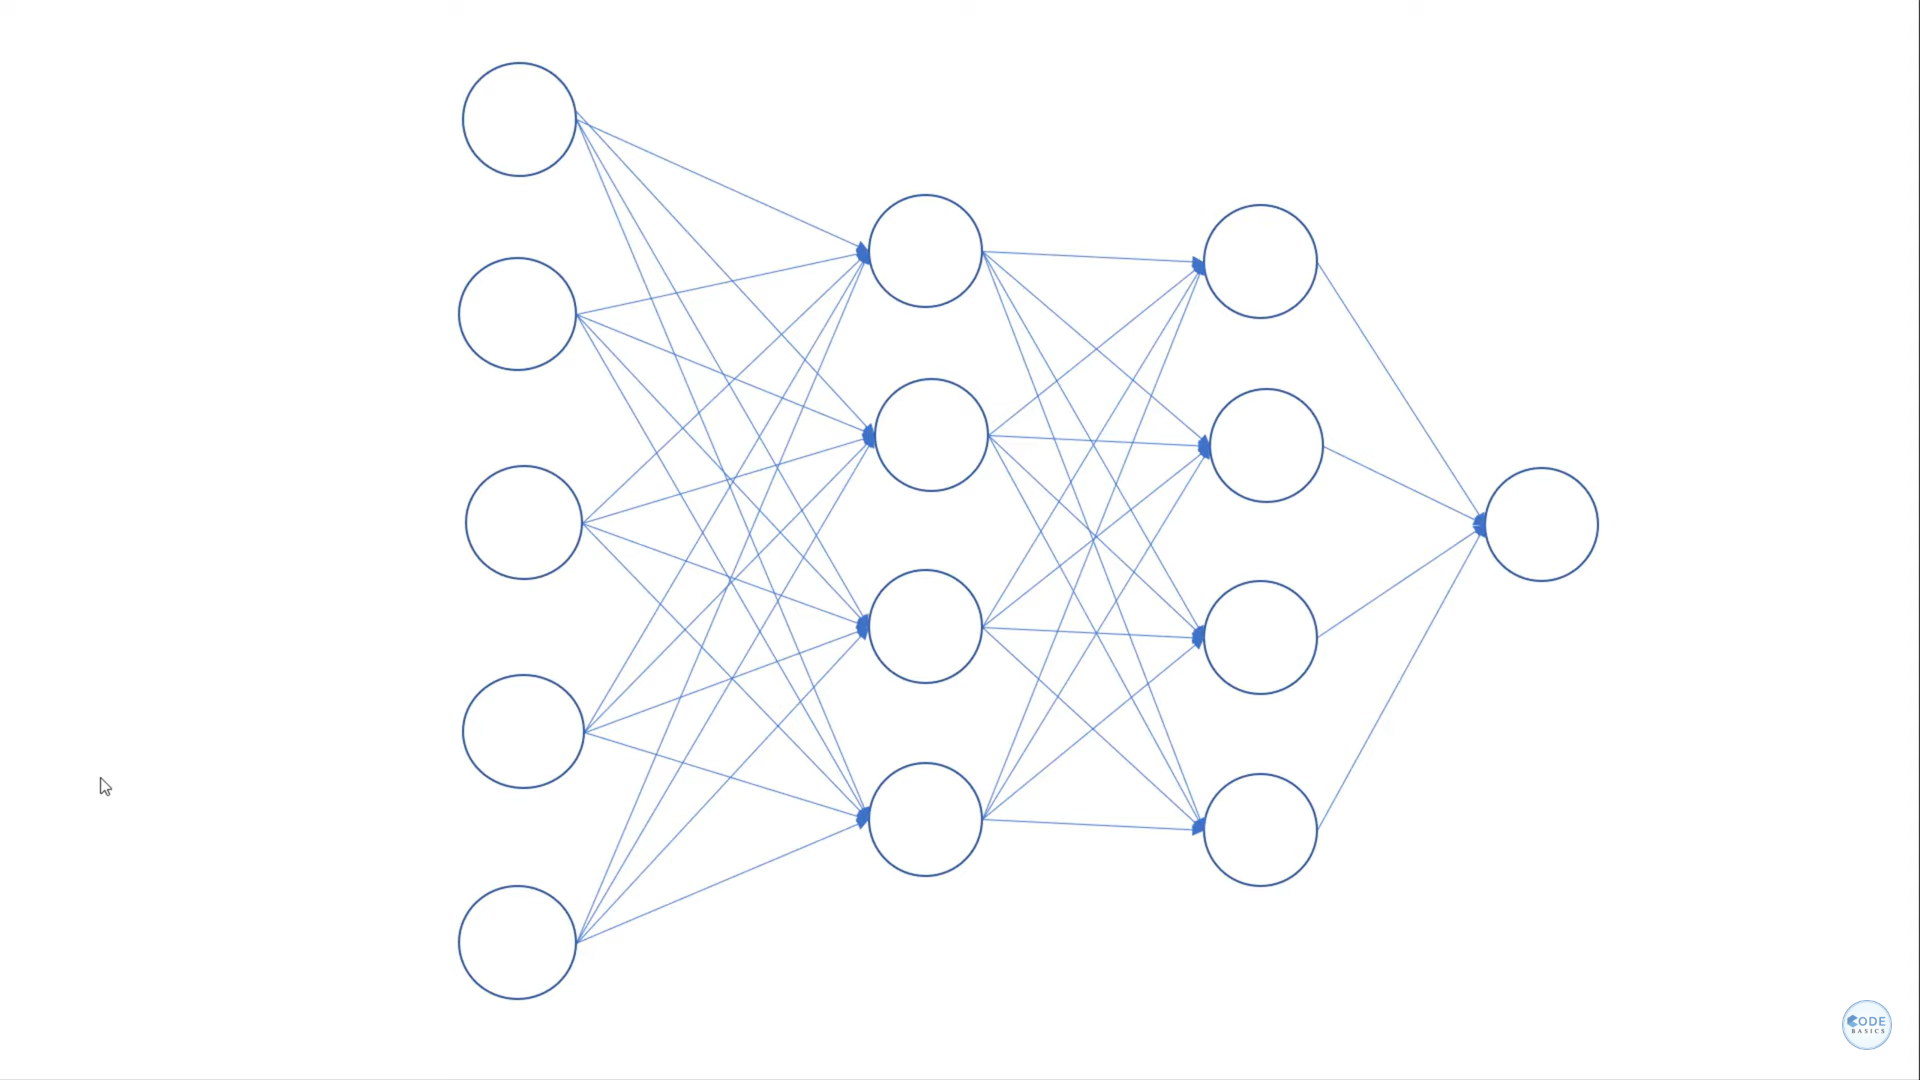
Hence some of the neurons has to dropped to eliminate the problem of overfitting

Dropping some of the neurons in Hidden layers
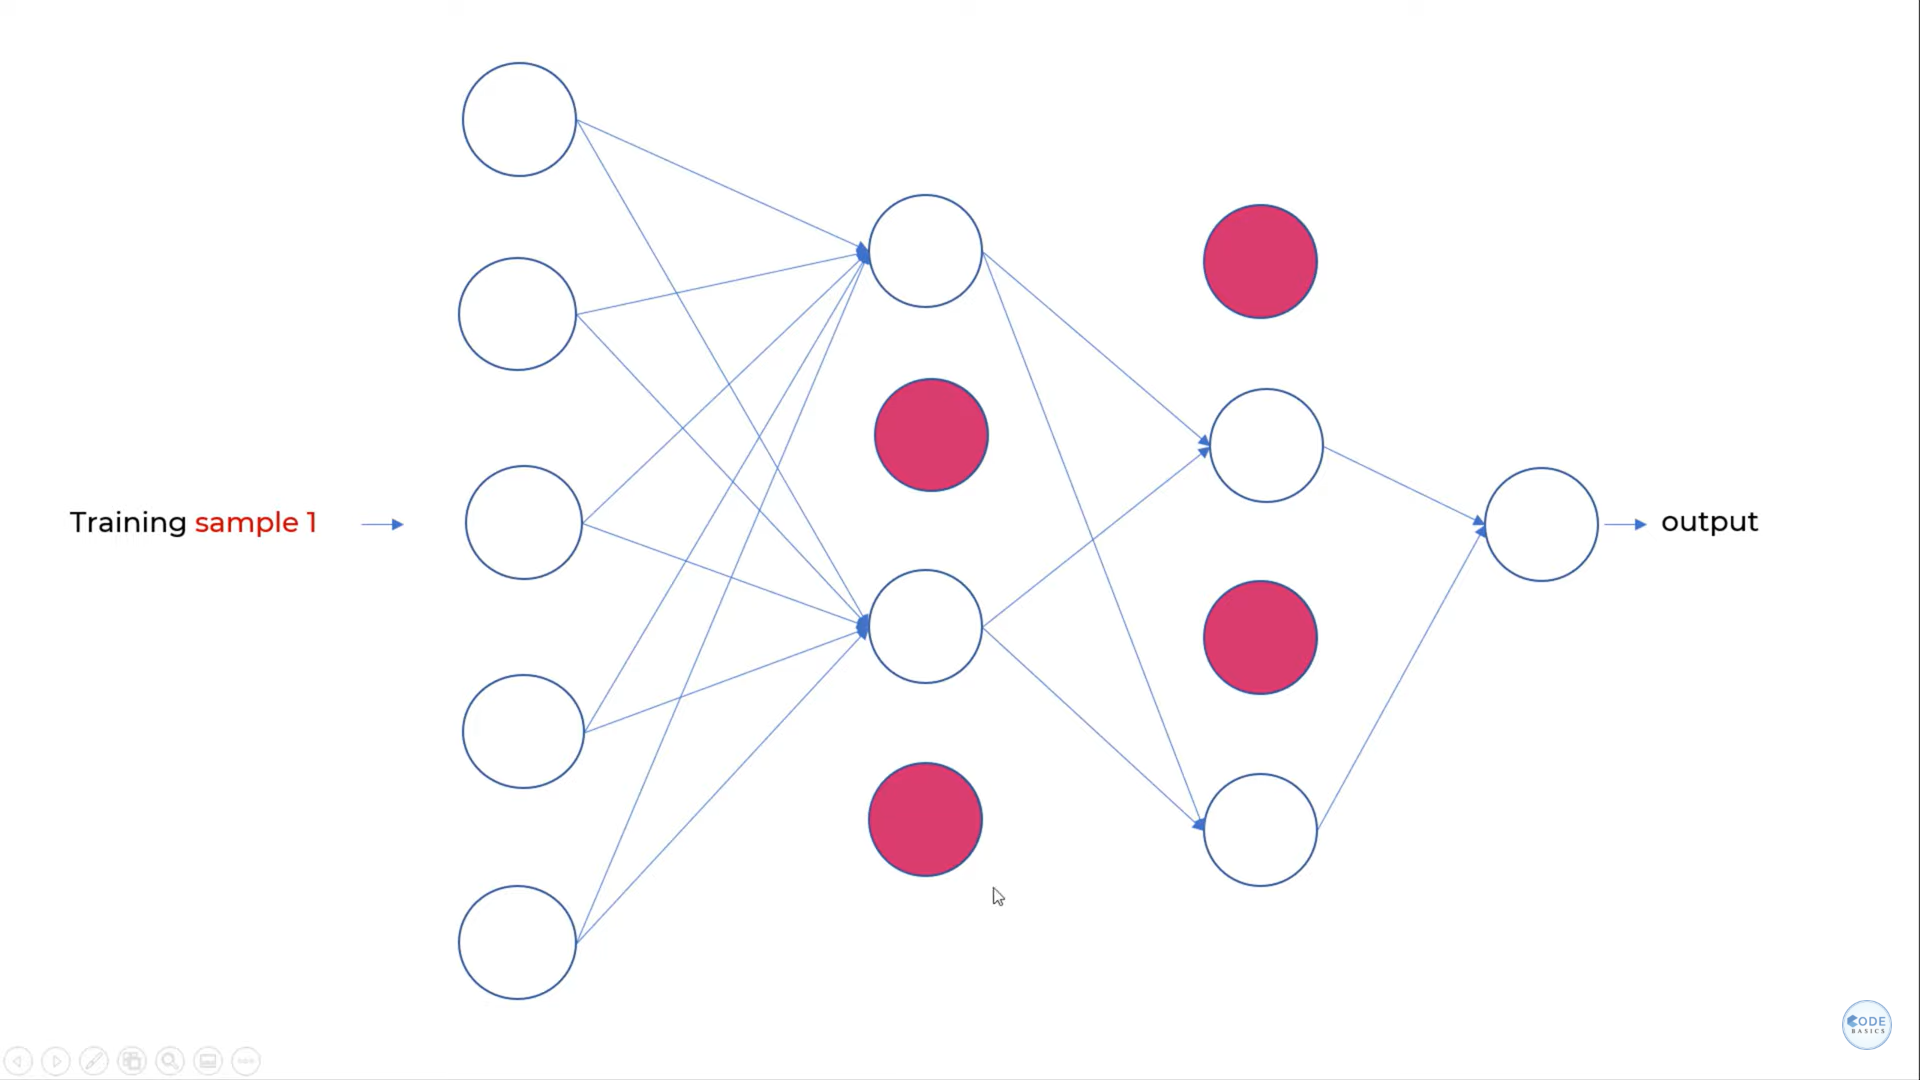

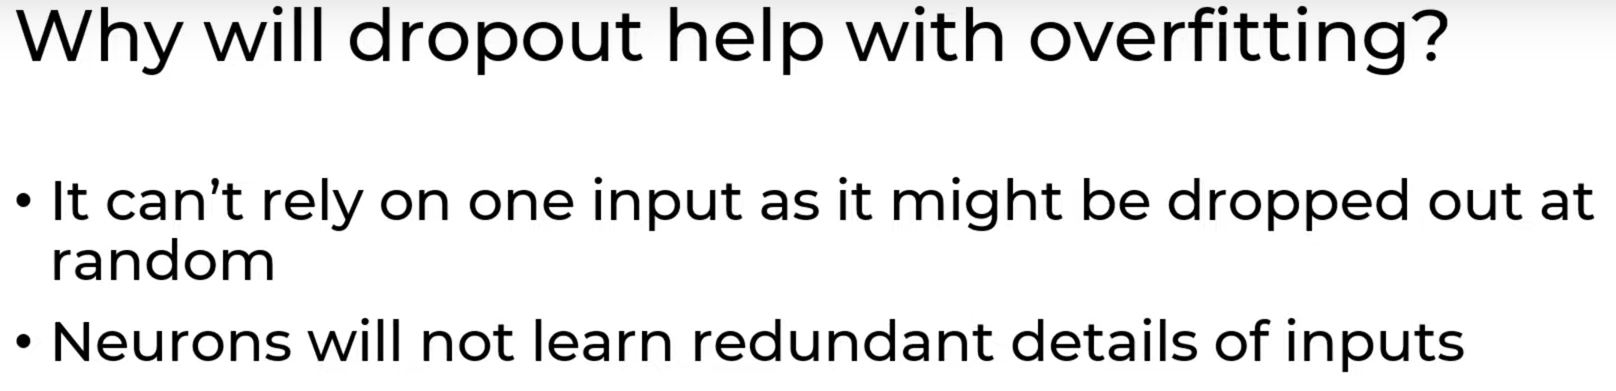

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf

In [24]:
data=pd.read_csv(r"D:\programming languages\datasets\sonar_dataset.csv",header=None)
data

0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      51      52      53      54      55      56      57  \
0    0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1    0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2    0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3    0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4    0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
203  0.2684  ...  0.0116  0.0098  0.0199  0.0033  0.0101  0.0065  0.0115   
204  0.2154  ...  0.0061  0.0093  0.0135  0.0063  0.0063  0.0034  0.0032   
205  0.2529  ...  0.0160  0.0029  0.0051  0.0062  0.0089  0.0140  0.0138   
206  0.2354  ...  0.0086  0.0046  0.0126  0.0036  0.0035  0.0034  0.0079   
207  0.2354  ...  0.0146  0.0129  0.0047  0.0039  0.0061  0.0040  0.0036   

         58      59  60  
0    0.0090  0.0032   R  
1    0.0052  0.0044   R  
2    0.0095  0.0078   R  
3    0.0040  0.0117   R  
4    0.0107  0.0094   R  
..      ...     ...  ..  
203  0.0193  0.0157   M  
204  0.0062  0.0067   M  
205  0.0077  0.0031   M  
206  0.0036  0.0048   M  
207  0.0061  0.0115   M  

[208 rows x 61 columns]

In [25]:
data.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [26]:
data.shape

(208, 61)

In [27]:
data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [28]:
data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [30]:
x=data.drop(60,axis=1)
x

0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53      54      55      56  \
0    0.2111  ...  0.0232  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180   
1    0.2872  ...  0.0125  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140   
2    0.6194  ...  0.0033  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316   
3    0.1264  ...  0.0241  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050   
4    0.4459  ...  0.0156  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
203  0.2684  ...  0.0203  0.0116  0.0098  0.0199  0.0033  0.0101  0.0065   
204  0.2154  ...  0.0051  0.0061  0.0093  0.0135  0.0063  0.0063  0.0034   
205  0.2529  ...  0.0155  0.0160  0.0029  0.0051  0.0062  0.0089  0.0140   
206  0.2354  ...  0.0042  0.0086  0.0046  0.0126  0.0036  0.0035  0.0034   
207  0.2354  ...  0.0181  0.0146  0.0129  0.0047  0.0039  0.0061  0.0040   

         57      58      59  
0    0.0084  0.0090  0.0032  
1    0.0049  0.0052  0.0044  
2    0.0164  0.0095  0.0078  
3    0.0044  0.0040  0.0117  
4    0.0048  0.0107  0.0094  
..      ...     ...     ...  
203  0.0115  0.0193  0.0157  
204  0.0032  0.0062  0.0067  
205  0.0138  0.0077  0.0031  
206  0.0079  0.0036  0.0048  
207  0.0036  0.0061  0.0115  

[208 rows x 60 columns]

In [36]:
y=data[60]
y

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

In [37]:
y=pd.get_dummies(y,drop_first=True)
y

R
0    1
1    1
2    1
3    1
4    1
..  ..
203  0
204  0
205  0
206  0
207  0

[208 rows x 1 columns]

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)
len(x_train)

166

In [41]:
len(x_test)

42

**Creating Deep neural network model**

In [45]:
model=keras.Sequential([
    keras.layers.Dense(60,input_shape=(60,),activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100,batch_size=8)#batch_size(size of each batch in Mini batch gradient descent)

Epoch 1/100
21/21 [==============================] - 1s 4ms/step - loss: 0.6947 - accuracy: 0.4940
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6575 - accuracy: 0.6506
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6226 - accuracy: 0.6566
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5892 - accuracy: 0.7470
Epoch 5/100
21/21 [==============================] - 0s 5ms/step - loss: 0.5469 - accuracy: 0.8012
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 0.5130 - accuracy: 0.7771
Epoch 7/100
21/21 [==============================] - 0s 5ms/step - loss: 0.5528 - accuracy: 0.6928
Epoch 8/100
21/21 [==============================] - 0s 5ms/step - loss: 0.4787 - accuracy: 0.8012
Epoch 9/100
21/21 [==============================] - 0s 5ms/step - loss: 0.4203 - accuracy: 0.8313
Epoch 10/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4495 - accuracy: 0.7831
Epoch 11/

21/21 [==============================] - 0s 5ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 84/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 85/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 86/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 87/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 88/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 89/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 90/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 91/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 92/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 93/100


In [46]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 0s/step - loss: 0.6371 - accuracy: 0.8095


[0.6370888352394104, 0.8095238208770752]

we can observe that , for training set the accuracy is 100 whereas for testing set the accuracy is only 80.   
It clearly indicating that the model is overfitted.    

It can handled using Dropout Regularization

**Dropout Regularization**

In [51]:
model1=keras.Sequential([
    keras.layers.Dense(60,input_shape=(60,),activation='relu'),
    keras.layers.Dropout(0.5),#0.5 --> 50% of neurons at this layer are dropped out and they are randomly dropped.
    keras.layers.Dense(30,activation='relu'),#every time we reload, a new set of neurons will be dropped
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model1.fit(x_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
21/21 [==============================] - 1s 3ms/step - loss: 0.7154 - accuracy: 0.5181
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.7268 - accuracy: 0.4880
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.7114 - accuracy: 0.5060
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6958 - accuracy: 0.5120
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.7053 - accuracy: 0.4940
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6963 - accuracy: 0.4880
Epoch 7/100
21/21 [==============================] - 0s 5ms/step - loss: 0.6862 - accuracy: 0.5422
Epoch 8/100
21/21 [==============================] - 0s 5ms/step - loss: 0.7071 - accuracy: 0.4699
Epoch 9/100
21/21 [==============================] - 0s 5ms/step - loss: 0.6907 - accuracy: 0.5361
Epoch 10/100
21/21 [==============================] - 0s 5ms/step - loss: 0.6829 - accuracy: 0.5241
Epoch 11/

21/21 [==============================] - 0s 5ms/step - loss: 0.3440 - accuracy: 0.8795
Epoch 84/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3128 - accuracy: 0.8855
Epoch 85/100
21/21 [==============================] - 0s 5ms/step - loss: 0.3008 - accuracy: 0.8795
Epoch 86/100
21/21 [==============================] - 0s 5ms/step - loss: 0.3204 - accuracy: 0.8735
Epoch 87/100
21/21 [==============================] - 0s 6ms/step - loss: 0.2941 - accuracy: 0.8916
Epoch 88/100
21/21 [==============================] - 0s 5ms/step - loss: 0.3185 - accuracy: 0.8916
Epoch 89/100
21/21 [==============================] - 0s 6ms/step - loss: 0.3066 - accuracy: 0.8976
Epoch 90/100
21/21 [==============================] - 0s 6ms/step - loss: 0.2987 - accuracy: 0.8855
Epoch 91/100
21/21 [==============================] - 0s 5ms/step - loss: 0.3463 - accuracy: 0.8494
Epoch 92/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3083 - accuracy: 0.8735
Epoch 93/100


In [50]:
model1.evaluate(x_test,y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.4689 - accuracy: 0.8095


[0.4689209461212158, 0.8095238208770752]

Here, we can observe that there is less difference between training set accuracy and testing set accuracy